In [230]:
from numpy import random
from random import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
np.random.seed(3)
from random import sample 

In [231]:
test_data = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
test_data = np.array([list(x) for x in test_data])

In [309]:
class GA():
    def __init__(self,k=2,pop_size=100, ind_size=8, n_iterations = 50, mutation_prob = 0.1, crossover_prob = 0.2, n_neighbors = 5):
        if not (ind_size == 8 or ind_size == 50):
            raise Exception("Sorry, only the ind_sizes 8 and 50 are supported")

        self.k = k
        self.pop_size = pop_size
        self.ind_size = ind_size
        self.hist = []
        self.data = np.loadtxt('file-tsp.txt')  if  self.ind_size == 50 else test_data
        self.k = 2
        self.crossover_prob = crossover_prob
        self.n_neighbors = n_neighbors
        self.n_iterations = n_iterations
        self.mutation_prob = mutation_prob
        
        
    def generate_pop(self):
        self.pop =  np.array([random.permutation([i for i in range(0,self.ind_size)]) for x in range(self.pop_size) ])
        
    def tournament(self, k=2):
        new_pop = []
        for i in range(self.pop_size):
            
            indices = random.choice(len(self.pop), k, replace=True)
            candidates = self.pop[indices]
            
            fittest =  candidates[0] if self.evaluate(candidates[0]) < self.evaluate(candidates[1]) else candidates[1]
            new_pop.append(fittest)
        return new_pop
    
    def evaluate(self,ind):
        l = []
        for i in range(self.ind_size-1):

            dist = np.linalg.norm(self.data[ind[i]]-self.data[ind[i+1]])    
            l.append(dist)
        return l, sum(l)
    
    def avg_pop(self, pop):
        return np.average([self.evaluate(x)[1] for x in pop])
    
    def get_best_sol(self, pop):
        best_index = 0
        best_fitness = self.evaluate(pop[0])[1]
        for i in range(1, len(pop)):
            current = self.evaluate(pop[0])[1]
            if (current > best_fitness):
                best_index = i
                best_fitness = current
        return (best_index, best_fitness)
    
    
    def order_crossover(self,p1, p2, p):
        if not (rand() < p):
            return p1, p2
        size = self.ind_size
        p1, p2 = list(p1), list(p2)
        #(1) CHOOSE 2 CUT POINTS
        start, end = np.sort(random.choice(range(1,size - 1), 2, replace = False))
        c1 = [-1] * size
        c2 = [-1] * size
        
        # (2) COPY BETWEEEN CUT POINTS TO OFFSPRINGS
        c1[start:end] = p1[start:end]
        c2[start:end] = p2[start:end]
        
        
        p1_order = p1[end:] + p1[:end]
        p2_order = p2[end:] + p2[:end]

        missing_indices = np.append(range(end,size),range(0,start))

        # (3) STARTING FROM 2ND CUT POINT IN ONE PARENT, FILL MISSING CITIES IN ORDER THEY APPEAR IN OTHER PARENT
        p1_pos, p2_pos = 0, 0
        for index in missing_indices:
            #child 1
            while True:
                if(p2_order[p2_pos] not in c1):
                    c1[index] = p2_order[p2_pos]
                    p2_pos += 1
                    break
                p2_pos += 1
            #child 2
            while True:
                if(p1_order[p1_pos] not in c2):
                    c2[index] = p1_order[p1_pos]
                    p1_pos += 1
                    break
                p1_pos += 1   
             
        return c1, c2
    
    def reverse_sequence_mutation(self, parent, p):
        result = parent.copy()
        if not (rand() < p):
            return parent
        size = self.ind_size
        i1, i2 = np.sort(random.choice(range(0,size ), 2, replace = False))
        old_parent = parent.copy()
        result[i1] = old_parent[i2]
        result[i2] = old_parent[i1]
        
        return result
    
    def local_search (self, pop):    
        new_pop = []
        
        for ind in pop:
            neighbors = [ind]
            for i in range(self.n_neighbors):
                neighbors.append(self.reverse_sequence_mutation(ind, 1))
            
            neighbor_values = [self.evaluate(x)[1] for x in neighbors]
            new_ind = neighbors[np.argmin(neighbor_values)]
            new_pop.append(new_ind)
        return new_pop
    
    
        
    def plot_hist(self):
        return self.hist
        
    def run(self):   
        self.generate_pop()
        self.pop = self.local_search(self.pop)
        for i in range(self.n_iterations):
            print(f'ik ben bij iteratie {i+1}')
            
            new_pop = self.tournament(self.k)
            
            #select parents for reproduction
           
            
            for j in range(0, len(new_pop), 2):
                p1 = self.pop[j]
                p2 = self.pop[j+1]
                
                #recombine selected parents
                c1, c2 = self.order_crossover(p1,p2, self.crossover_prob)
                
                #mutate the resulting individuals
                c1 = self.reverse_sequence_mutation(c1, self.mutation_prob)
                c2 = self.reverse_sequence_mutation(c2, self.mutation_prob)

                
                new_pop[j] = c1
                new_pop[j+1] = c2
            #LOCAL SEARCH
            new_pop = self.local_search(new_pop)
            
            
            best_index, best_fitness = self.get_best_sol(self.pop)
            self.hist.append((best_fitness, self.pop[best_index]))
            
            new_index, new_fitness = self.get_best_sol(np.array(new_pop))
            #if(new_fitness < best_fitness):
            self.pop = np.array(new_pop)
                

In [343]:
g = GA(ind_size=50, n_iterations = 60, mutation_prob=0.8, pop_size=100, crossover_prob=0.8, n_neighbors = 30, k=2)

In [344]:
g.run()

ik ben bij iteratie 1
ik ben bij iteratie 2
ik ben bij iteratie 3
ik ben bij iteratie 4
ik ben bij iteratie 5
ik ben bij iteratie 6
ik ben bij iteratie 7
ik ben bij iteratie 8
ik ben bij iteratie 9
ik ben bij iteratie 10
ik ben bij iteratie 11
ik ben bij iteratie 12
ik ben bij iteratie 13
ik ben bij iteratie 14
ik ben bij iteratie 15
ik ben bij iteratie 16
ik ben bij iteratie 17
ik ben bij iteratie 18
ik ben bij iteratie 19
ik ben bij iteratie 20
ik ben bij iteratie 21
ik ben bij iteratie 22
ik ben bij iteratie 23
ik ben bij iteratie 24
ik ben bij iteratie 25
ik ben bij iteratie 26
ik ben bij iteratie 27
ik ben bij iteratie 28
ik ben bij iteratie 29
ik ben bij iteratie 30
ik ben bij iteratie 31
ik ben bij iteratie 32
ik ben bij iteratie 33
ik ben bij iteratie 34
ik ben bij iteratie 35
ik ben bij iteratie 36
ik ben bij iteratie 37
ik ben bij iteratie 38
ik ben bij iteratie 39
ik ben bij iteratie 40
ik ben bij iteratie 41
ik ben bij iteratie 42
ik ben bij iteratie 43
ik ben bij iteratie 

In [345]:
best_fitness, best_solutions = [x[0] for x in g.plot_hist()], [x[1] for x in g.plot_hist()]
best_solution = best_solutions[np.argmin(best_fitness)]
print(f'best fitness: {np.min(best_fitness)} epoch: {np.argmin(best_fitness)}')

best fitness: 333.4750347384069 epoch: 59


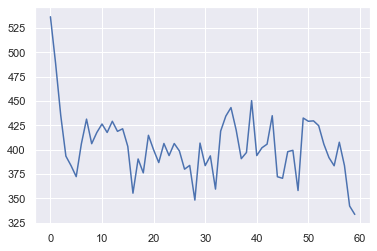

In [346]:
plt.plot(range(len(best_fitness)), [x for x in best_fitness])
plt.show()

In [347]:
def plotfunc(seq, locs):
    sortlocs = [locs[_ind] for _ind in seq]
    xs = [loc[0] for loc in sortlocs]
    ys = [loc[1] for loc in sortlocs]
    
    plt.figure(0)
    plt.scatter(xs, ys)
    plt.plot(xs, ys)
    plt.show()
    


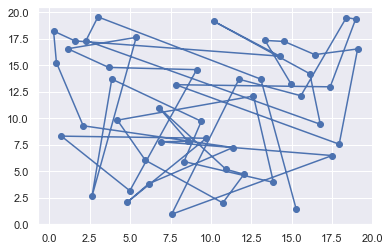

In [348]:
locs = np.loadtxt('file-tsp.txt')
#locs = test_data
plotfunc(best_solution, locs)

In [275]:
np.argmin(best_fitness)

85